# Classification_Task_Flower_ Classification_manual_Split_No_of_Augmention

## Importing Data

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Train_dataGen = ImageDataGenerator(rescale=1/255,rotation_range=20,horizontal_flip=True,width_shift_range=0.2,
    height_shift_range=0.2)

Test_dataGen =ImageDataGenerator(rescale=1/255,rotation_range=20,horizontal_flip=True,width_shift_range=0.2,
    height_shift_range=0.2)

## CNN Model

In [3]:
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dense,Dropout 
from keras.models import Sequential

In [4]:
model=Sequential()

In [5]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(5,activation='softmax'))

In [6]:
train_itt =Train_dataGen.flow_from_directory('D:\\DATA Science\\DEEP LEARNING\\CNN\Flower_Classification\\DataSet\\Flower_by_Split_folder\\train',
                                           batch_size=64,target_size=(100,100))

test_itt = Test_dataGen.flow_from_directory('D:\\DATA Science\\DEEP LEARNING\\CNN\Flower_Classification\\DataSet\\Flower_by_Split_folder\\test',
                                           batch_size=64,target_size=(100,100))

Found 3451 images belonging to 5 classes.
Found 498 images belonging to 5 classes.


In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
model.fit(train_itt,validation_data=test_itt,epochs=8)

Epoch 1/8
54/54 [==============================] - 81s 1s/step - loss: 1.3956 - accuracy: 0.3976 - val_loss: 1.1541 - val_accuracy: 0.5221
Epoch 2/8
54/54 [==============================] - 105s 2s/step - loss: 1.1096 - accuracy: 0.5607 - val_loss: 1.0002 - val_accuracy: 0.6064
Epoch 3/8
54/54 [==============================] - 108s 2s/step - loss: 1.0208 - accuracy: 0.6048 - val_loss: 0.9931 - val_accuracy: 0.6265
Epoch 4/8
54/54 [==============================] - 169s 3s/step - loss: 0.9457 - accuracy: 0.6381 - val_loss: 0.9452 - val_accuracy: 0.6526
Epoch 5/8
54/54 [==============================] - 152s 3s/step - loss: 0.8954 - accuracy: 0.6543 - val_loss: 0.8364 - val_accuracy: 0.6847
Epoch 6/8
54/54 [==============================] - 167s 3s/step - loss: 0.8736 - accuracy: 0.6607 - val_loss: 0.9186 - val_accuracy: 0.6566
Epoch 7/8
54/54 [==============================] - 166s 3s/step - loss: 0.8189 - accuracy: 0.6879 - val_loss: 0.8053 - val_accuracy: 0.6968
Epoch 8/8
54/54 [====

In [9]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

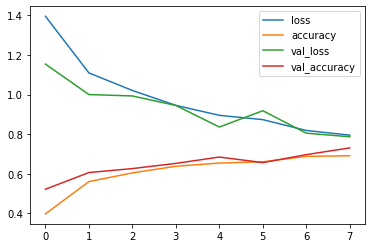

In [10]:
losses.plot()

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score

In [12]:
predictions = model.evaluate(test_itt)

8/8 [==============================] - 6s 753ms/step - loss: 0.8114 - accuracy: 0.7289


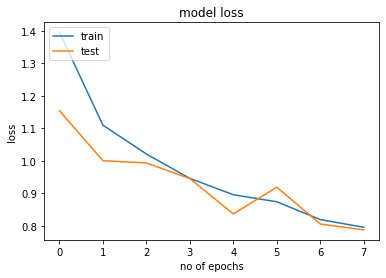

In [13]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

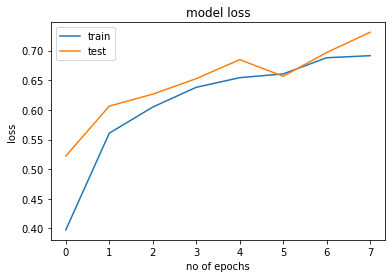

In [14]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [15]:
class_label= test_itt.class_indices
class_label

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [16]:
model.save('flower_baseline_model.h5')